# Procesamiento de Imágenes - Trabajo Práctico N°5
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# Ejercicio 4 - Motion Blur

El "Motion Blur" o desenfoque por movimiento es el que se observa en los objetos en movimiento en una fotografía (o un frame de un video). Este efecto se produce a causa de que los objetos se mueven durante el tiempo de exposición de la fotografía. A su vez, puede ser causado debido a un movimiento accidental de la cámara en dicho tiempo de exposición.

El desenfoque por movimiento depende directamente de la velocidad de obsturación, el tiempo que el diafragma de la cámara se encuentra abierto. Una velocidad de obsturación más lenta implica un mayor tiempo de exposición, lo cual genera como consecuencia que los objetos en movimiento resulten más desenfocados. Por el contrario, una velocidad de obsturación muy rápida puede generar que el desenfoque no sea perceptible. 



El "Motion Blur" es principalmente buscado a fin de lograr imágenes con un aspecto natural en los casos donde se fotografíe un objeto en movimiento. Sin embargo, es necesario limitar su efecto ya que de lo contrario se producirían líneas en exceso. A su vez, el desenfoque de movimiento en la fotografía puede dar a una imagen fija una sensación de velocidad o transmitir el paso del tiempo.

A modo de ejemplo, en las siguientes imágenes se logró lo mencionado. Las líneas percibidas brindan la percepción de paso del tiempo. Incluso, pueden resultar más similares a lo observado por el ojo humano que una imagen completamente estática.

![](../../assets/ej4/motion_1.jpg)
![](../../assets/ej4/motion_2.jpg)
![](../../assets/ej4/motion_3.jpg)


En otros casos, el efecto que genera no es deseado, normalmente debido al movimiento accidental de la cámara o al movimiento de un objeto que no era de interés percibir. En estos casos, se deben aplicar técnicas a fin de poder restaurar las imágenes. No obstante, ninguno de los algoritmos existentes permite una restauración perfecta. 

En las siguientes imágenes se muestran casos donde el efecto generado por el "Motion Blur" no es deseado. En la primera de ellas, causado por el movimiento de la cámara durante la exposición. En la siguiente, el desenfoque se produce por el movimiento del vehículo mientras lo que se busca fotografiar es la escena en general.
![](../../assets/ej4/motion_4.jpg)
![](../../assets/ej4/motion_5.jpg)

# Generación de Motion Blur
Existen técnicas para incorporar desenfoque por movimiento en una imagen. Para ello, es necesario convolucionarla con un filtro, el cual consiste en una línea vertical, horizontal, o diagonal de 1s mientras el resto de sus valores son 0. La orientación de esta línea de 1s determina la orientación de las líneas presentes en la imagen resultante. Además, el orden del filtro se encuentra directamente relacionado a la cantidad de desenfoque añadido.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
from scipy.signal import convolve2d, wiener
# Add the folder path to the sys.path list
sys.path.append('../../src/helpers/')
from mse import mse

(630, 1200)


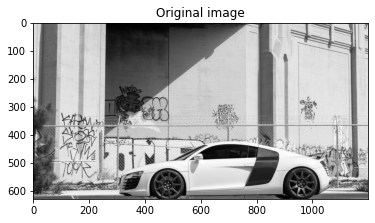

In [2]:
# Open image
car = np.array(Image.open('../../assets/ej4/car.jpg').convert('L'))

# Plot image
plt.title('Original image')
plt.imshow(car, cmap='gray');
print(car.shape)

### Implementación del filtro

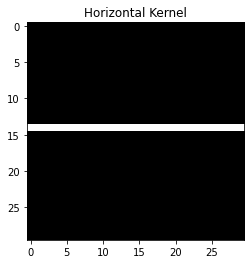

In [3]:
# Implementación del filtro horizontal.
kernel_order = 30
kernel_h = np.zeros((kernel_order, kernel_order))
  
# Fill the middle row with ones.
kernel_h[int((kernel_order - 1)/2), :] = np.ones(kernel_order)
  
# Normalize.
kernel_h /= kernel_order

# Plot image
plt.title('Horizontal Kernel')
plt.imshow(kernel_h, cmap='gray');

### Aplicación del filtro

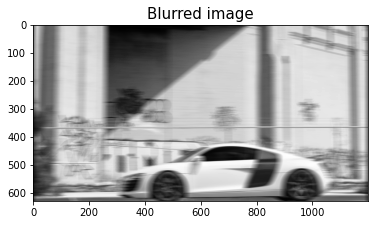

In [4]:
motion_blur_car = convolve2d(car, kernel_h, mode = 'same')
plt.imshow(np.abs(motion_blur_car), cmap='gray')
plt.title('Blurred image', fontsize=15)
plt.show()

Se puede destacar como al aplicar el desenfoque la imagen transmite la sensación de que el auto se encuentra en movimiento, a diferencia de la imagen original. Sin embargo, al aplicación del efecto a toda la imagen trae como consecuencia que la pared de fondo también se encuentre desenfocada, algo no deseable.

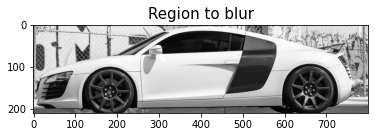

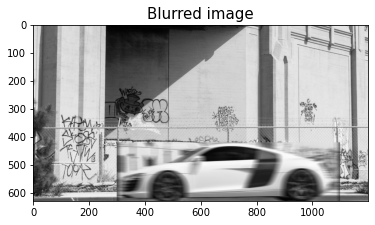

In [5]:
only_car_blurred = car.copy()
y_min = 420
x_min = 300
x_max = 1100
a = car[y_min:,x_min:x_max]
plt.imshow(np.abs(a), cmap='gray')
plt.title('Region to blur', fontsize=15)
plt.show()
only_car_blurred[y_min:,x_min:x_max] = convolve2d(car[y_min:,x_min:x_max], kernel_h, mode = 'same')
plt.imshow(np.abs(only_car_blurred), cmap='gray')
plt.title('Blurred image', fontsize=15)
plt.show()

En el ejemplo anterior, el efecto del desenfoque por movimiento es mejorado al ser solamente aplicado a la región del auto. Esto genera que dicha región se perciba en movimiento, mientras que el fondo resulte estático.

### Aplicación de un filtro vertical

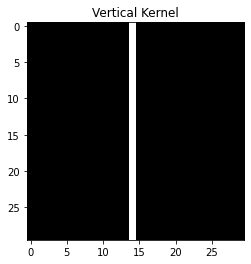

In [6]:
# Implementación del filtro horizontal.
kernel_order = 30
kernel_v = np.zeros((kernel_order, kernel_order))
  
# Fill the middle row with ones.
kernel_v[:, int((kernel_order - 1)/2)] = np.ones(kernel_order)
  
# Normalize.
kernel_v /= kernel_order

# Plot image
plt.title('Vertical Kernel')
plt.imshow(kernel_v, cmap='gray');

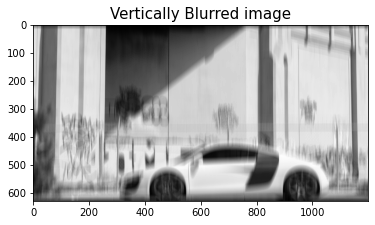

In [7]:
motion_blur_car_v = convolve2d(car, kernel_v, mode = 'same')
plt.imshow(np.abs(motion_blur_car_v), cmap='gray')
plt.title('Vertically Blurred image', fontsize=15)
plt.show()

Efectivamente, la aplicación del filtro vertical generó que el desenfoque se realice en la misma dirección. De esta forma, en la imagen no se logra el efecto deseado de velocidad.